# Regression

As always we must first import the libraries that we need:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

If we want to make a function that graphs a straight line we could do so like this:

In [2]:
# declare function called linear_line
# function takes an array fro the x values,
# and a number for the slope (m) and the 
# y-intercept(b), then returns an array of y values

def linear_line(x, m, b): # declaration of function
    return m*x + b #function returns y = m*x + b


If I would like to make a line with a slope of 4 and a y-intercept of 2:

In [3]:
m = 4 # set m (slope) equal to 4
b = 2 # set b (y-intercept) equal to 2

# the numpy arrange function is of the 
# form np.arrange(start, end, increment)
x = np.arange(1, 21, 1) # create numpy array from 1 to 21 in increments 
                        # of 1

# create y that corresponds to x using the linear_line(x, m, b)
y = linear_line(x, m, b)

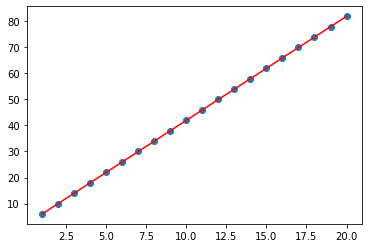

In [4]:
# plot the points as a scatter plot and as a line
plt.scatter(x, y)
plt.plot(x, y, color='red')

But what if I had a bunch of data points and wanted to get a line?

In [5]:
# import the stats module from scipy
from scipy import stats

In [6]:
# run linear regression on the (x, y) points we made
stats.linregress(x, y)

LinregressResult(slope=4.0, intercept=2.0, rvalue=1.0, pvalue=9.49609375000032e-179, stderr=0.0, intercept_stderr=0.0)

This function tells us what the slope is but we already knew that. Let's add some randomness to our data and see what happens:

In [7]:
# create random noise using np.random.normal(mean, st. dev., #points)
noise = np.random.normal(3, 3, 20)

# add the random noise to y
noisy_y = y + noise

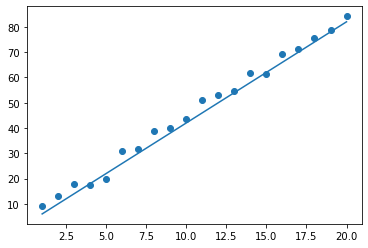

In [8]:
# plot the new points and the old regression line
plt.scatter(x, noisy_y)
plt.plot(x, y)

Our line doesn't look like such a good fit for the data anymore, so let's find a new one:

In [9]:
# run linear regression on the new data
new_line = stats.linregress(x, noisy_y)

# Look at output
print(new_line)

LinregressResult(slope=3.954077542954003, intercept=4.612231801462286, rvalue=0.9966419893325636, pvalue=5.0936585778003446e-21, stderr=0.0765703945223102, intercept_stderr=0.917248130569297)


We can see that the first item in the list is the slope and the second is the intercept therefore:

In [10]:
# Grab the slope and y-intercept as the first and second 
# elements of new_line
slope = new_line[0]
y_int = new_line[1]

print("slope = ", slope, ", y-int = ", y_int)

slope =  3.954077542954003 , y-int =  4.612231801462286


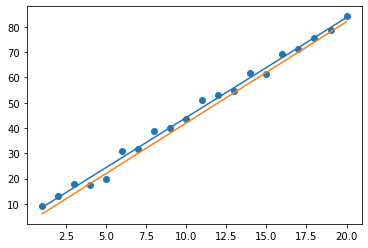

In [11]:
# plot a scatterplot of the noisy data
plt.scatter(x, noisy_y)


# plot the new line
plt.plot(x, linear_line(x, slope, y_int))

#plot the original line
plt.plot(x, y)

Now, what if we have more complicated lines? Say quadratic, or exponential? Let's try another function with a linear trend first before exploring these other options:

In [12]:
from scipy.optimize import curve_fit

Let's make some random data again:

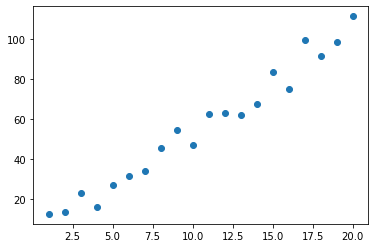

In [13]:
# make a line with slope = 5 and y-int = 2
y = linear_line(x, 5, 2)

# add noise to y
y = y + np.random.normal(3, 5, 20)

# plot the noisy data points
plt.scatter(x,y)

And now we can use curve_fit on our linear function:

In [14]:
# the curve_fit function take in three variables: 
# a function that defines the type of line, the 
# x values of the data, and the y values of the data

# the curve_fit function returns two objects: an array
# of the coefficients and an array of covariants, which 
# can help determine the error

opt, cov = curve_fit(linear_line, x, y)

print(opt)
print(cov)

[5.09732769 2.59744598]
[[ 0.04737656 -0.49745387]
 [-0.49745387  6.79853707]]


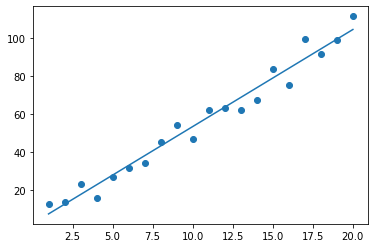

In [15]:
# plot (x,y) data as scatterplot
plt.scatter(x, y)

# plot regression line
plt.plot(x, linear_line(x, opt[0], opt[1]))

Let's try some other types of functions. Here are some function definitions:

In [16]:
# Definition for linear line function
def linear_line(x, m, b):
    y = m*x + b
    return y

# definition for quadratic line function
def quadratic_line(x, a, b, c):
    y = a*(x**2) + b*x + c
    return y

# definition for exponential line function
def exponential_line(x, a, b, c):
    y = a*np.exp(b*x) + c
    return y

# definition for log line function
# For log you will need to change x to x+1 so
# that you are not dividing by zero!
def log_line(x, a, b, c):
    y = a*np.log(b*x) + c
    return y

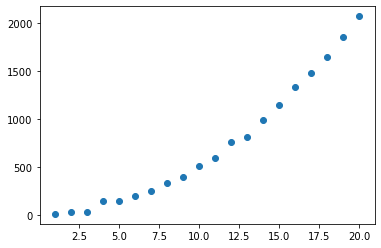

In [17]:
# make a new quadratic line
y = quadratic_line(x, 5, 2, 2)

# add random noise
y = y + np.random.normal(0, 30, 20)

# make a scatter plot
plt.scatter(x,y)

[ 5.35204536 -5.76093162 33.228516  ]
[[ 3.37786704e-02 -7.09352065e-01  2.60095751e+00]
 [-7.09352065e-01  1.57881496e+01 -6.39835500e+01]
 [ 2.60095751e+00 -6.39835500e+01  3.28240779e+02]]


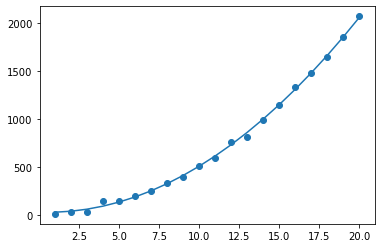

In [18]:
# run the curve_fit function using our quadratic line function
opt, cov = curve_fit(quadratic_line, x, y)

# print the output of curve_fit
print(opt)
print(cov)

# plot the (x, y) data points and the quadratic fit line
plt.scatter(x,y)
plt.plot(x, quadratic_line(x, opt[0], opt[1], opt[2]))

Now let's repeat this for an expoenential line:

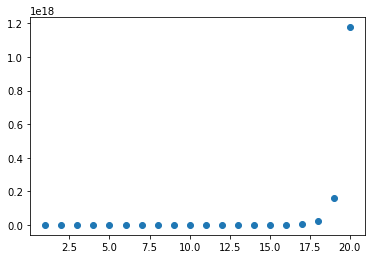

In [19]:
y = exponential_line(x, 5, 2, 2)
y = y + np.random.normal(4, 30, 20)
plt.scatter(x,y)

/var/folders/r0/547pgkzd2yj83fhrcvxlhlph0000gp/T/ipykernel_54343/3799848842.py:13: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(b*x) + c
/var/folders/r0/547pgkzd2yj83fhrcvxlhlph0000gp/T/ipykernel_54343/3799848842.py:13: RuntimeWarning: overflow encountered in multiply
  y = a*np.exp(b*x) + c
/var/folders/r0/547pgkzd2yj83fhrcvxlhlph0000gp/T/ipykernel_54343/3799848842.py:13: RuntimeWarning: overflow encountered in exp
  y = a*np.exp(b*x) + c
/var/folders/r0/547pgkzd2yj83fhrcvxlhlph0000gp/T/ipykernel_54343/3799848842.py:13: RuntimeWarning: overflow encountered in multiply
  y = a*np.exp(b*x) + c


(array([2.19199029, 2.00174051, 1.48501474]),
 array([[ 8.62521463e+03, -1.96917566e+02, -5.50196526e+10],
        [-1.96917566e+02,  4.49593068e+00,  1.25607568e+09],
        [-5.50196526e+10,  1.25607568e+09,  2.33332292e+33]]))

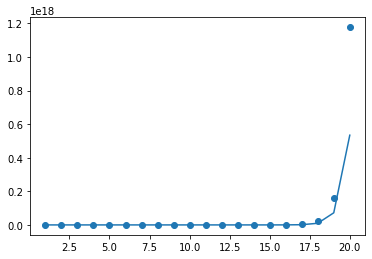

In [20]:
opt, cov = curve_fit(exponential_line, x, y)

plt.scatter(x,y)
plt.plot(x, exponential_line(x, opt[0], opt[1], opt[2]))

curve_fit(exponential_line, x, y)

Now let's repeat this for a log line:

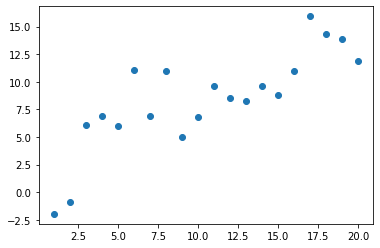

In [21]:
y = log_line(x, 5, 0.5, 0.5)
y = y + np.random.normal(1, 2, 20)
plt.scatter(x,y)

/var/folders/r0/547pgkzd2yj83fhrcvxlhlph0000gp/T/ipykernel_54343/3799848842.py:20: RuntimeWarning: invalid value encountered in log
  y = a*np.log(b*x) + c
/var/folders/r0/547pgkzd2yj83fhrcvxlhlph0000gp/T/ipykernel_54343/3799848842.py:20: RuntimeWarning: invalid value encountered in log
  y = a*np.log(b*x) + c


(array([  4.71186982,  11.49630388, -13.04752402]),
 array([[ 4.85698704e-01, -2.32416480e+06,  9.52578898e+05],
        [-2.32416478e+06,  1.26148322e+15, -5.17030918e+14],
        [ 9.52578891e+05, -5.17030918e+14,  2.11910049e+14]]))

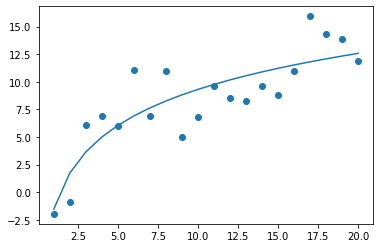

In [22]:
opt, cov = curve_fit(log_line, x, y)

plt.scatter(x,y)
plt.plot(x, log_line(x, opt[0], opt[1], opt[2]))

curve_fit(log_line, x, y)

Now lets's talk about error. To do this we will look at the R-squared values and the mean squared error. We can import functions for these from sklearn.metrics:

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
# gets the predicted y values for each x
y_pred = log_line(x, *opt)

# prints the r-squared and mean squared error between actual y and predicted y
print(r2_score(y, y_pred))
print(mean_squared_error(y, y_pred))

0.7306609325870435
5.135323115060979


Our r-squared value will be between 0 and 1, with 0 being no relation between the data and fit line, and 1 being a perfect fit. This one is 0.73, so our line accounts for roughly 73% of our data, which is ok, but not very good. A good fit would be above 90% and exelent would be above 98%.

Additionally, our mean squared error (MSE) is 5.13. This provides a measure of the average distance that our data points are away from the line. The closer to zero the better, but the significance of this error value also depends on the units being dealt with. For example, if something has an error of roughly 5 seconds, but the data that we are looking at is on the scale of days, then a 5 second MSE would be very small. However, if we were looking at something on the nanosecond time scale, then it would be an incredibly large error.

# Logistic Regression

Now let's talk about what would happen if our data was binary, meaning that we only had two options like true/false, short/tall, or wet/dry. We will also be talking about how to split data into training and testing data.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
df = pd.read_csv('life_exp.csv')

In [29]:
df.head()

,Country,Year,Status,Status_binary,Lifeexp,Adultmortality,Infantdeaths,Alcohol,PercExpend,HepB,...,Polio,Totalexpend,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19yrs,thinness5-9yrs,Incomecompofresources,Schooling
0,Afghanistan,2015,Developing,0,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,0,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,0,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,0,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,0,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


We are going to be focusing on Lifeexp and Status_binary, so let's plot them:

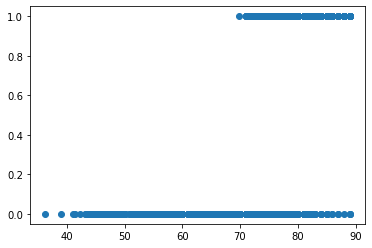

In [57]:
plt.scatter(df["Lifeexp"], df["Status_binary"])

Now we are going to separate our data into a training and a testing set, at an 80:20 ratio.

In [73]:
x_train,x_test,y_train,y_test=train_test_split(df["Lifeexp"],df["Status_binary"],test_size=0.2,random_state=0)

Additionally, we need to make our x data into columns instead of rows for this model. We can do this by reshaping them like this:

In [74]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

Now we can create the LogisticRegression model and fit our data.

In [75]:
logreg = LogisticRegression()

In [76]:
logreg.fit(x_train,y_train)

LogisticRegression()

Now, let's graph what this model looks like:

In [77]:
from scipy.special import expit

In [87]:
x_line = np.linspace(30,110,1000)
y_line = x_line * logreg.coef_ + logreg.intercept_

In [88]:
sigmoid = expit(y_line)

Text(0, 0.5, 'Status binary')

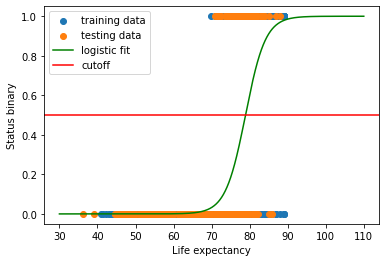

In [93]:
plt.scatter(x_train, y_train, label="training data")
plt.scatter(x_test, y_test, label="testing data")
plt.plot(x_line,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend()
plt.xlabel("Life expectancy")
plt.ylabel("Status binary")

Now lets run our test set and see how well our training set can predict it:

In [97]:
y_pred = logreg.predict(x_test)

In [100]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.17436585521691916
0.10462776659959759


So, we can see that this does a pretty poor job of correctly predicting this. Which makes sense looking at this plot:

Text(85, 0.05, '<--False Positive-->')

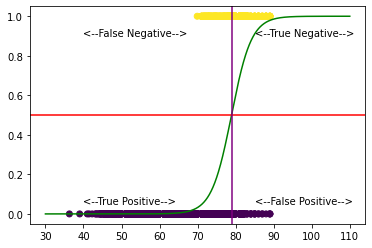

In [113]:
# 1. Plot the Species on y-axis and Sepal Length on x-axis
plt.scatter(df["Lifeexp"], df["Status_binary"], c=df["Status_binary"])
 
# 2. Plot the logistic regression curve based on the sigmoid function
# ravel to convert the 2-d array to a flat array
plt.plot(x_line,sigmoid.ravel(),c="green", label = "logistic fit")
# plt.scatter(X_test[:,0],probabilities)
  
# Draw a horizontal line (in red) indicating the threshold (cutoff) probability
plt.axhline(.5, color="red", label="cutoff")
 
# Draw a vertical line (in purple) indicating the threshold (cutoff) sepal length
plt.axvline(79, color="purple", label="")
 
# Use text to show the Negative and positive values
plt.text(85,0.9,"<--True Negative-->")
plt.text(40,0.9,"<--False Negative-->")
plt.text(40,0.05,"<--True Positive-->")
plt.text(85,0.05,"<--False Positive-->")

Now lets look at the confusion matrix:

In [114]:
from sklearn import metrics

In [115]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[406  17]
 [ 35  39]]


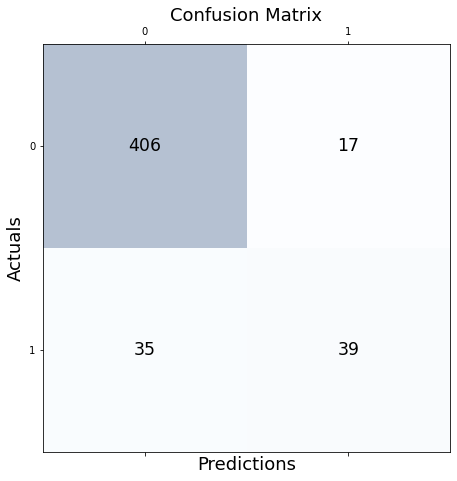

In [116]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

This shows us that for 0, we predict 0 correctly 406 times. However, for 1 we only predict 1 correct 39 times. Essentially, this model is skewed towards predicting 0, which makes it unreliable for predicting 1.

Now let's look at the cassification report.

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       423
           1       0.70      0.53      0.60        74

    accuracy                           0.90       497
   macro avg       0.81      0.74      0.77       497
weighted avg       0.89      0.90      0.89       497



In [123]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8953722334004024
Precision: 0.6964285714285714
Recall: 0.527027027027027


What do these different things all mean?

**Precision**: Percentage of correct positive predictions relative to total positive predictions.

**Recall**: Percentage of correct positive predictions relative to total actual positives.

**F1 Score**: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

        F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Using these three metrics, we can understand how well a given classification model is able to predict the outcomes for some response variable.